In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
import numpy as np
import pandas as pd
import sklearn as sk
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import *
from sklearn.metrics import log_loss
from sklearn.ensemble import *



In [ ]:
path = '../data/'
names = [0,1]

In [4]:
!ls ../data

In [5]:
test = pd.read_csv(path+'test.csv')

In [6]:
train = pd.read_csv(path+'train.csv', nrows=20000)

In [7]:
sample = pd.read_csv(path+'sample_submission.csv')

In [8]:
test['question1'][0]

'How does the Surface Pro himself 4 compare with iPad Pro?'

In [9]:
train['question1'] = train['question1'].fillna('NA')
train['question2'] = train['question2'].fillna('NA')

In [10]:

y = train["is_duplicate"].values
X = train.drop('is_duplicate', axis =1)

In [11]:
def tokenize(text):
    text = [word.lower().strip() for word in text.split(' ')]
    return text

In [12]:
vectorizer = CountVectorizer(tokenizer=tokenize)
vectorizer.fit_transform(train['question1']+" "+train['question2'])

<20000x36291 sparse matrix of type '<class 'numpy.int64'>'
	with 331671 stored elements in Compressed Sparse Row format>

In [13]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)

In [14]:
trn_q1 = vectorizer.transform(X_train['question1'])
trn_q2 = vectorizer.transform(X_train['question2'])
val_q1 = vectorizer.transform(X_valid['question1'])
val_q2 = vectorizer.transform(X_valid['question2'])

In [15]:
trn_q2

<16000x36291 sparse matrix of type '<class 'numpy.int64'>'
	with 169972 stored elements in Compressed Sparse Row format>

In [16]:
trn_q1

<16000x36291 sparse matrix of type '<class 'numpy.int64'>'
	with 167774 stored elements in Compressed Sparse Row format>

In [17]:
X_train.shape

(16000, 5)

In [18]:
m = LogisticRegression()

In [19]:
m.fit(trn_q1-trn_q2,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [20]:
predict_trn = m.predict_proba(trn_q1-trn_q2)
predict_val = m.predict_proba(val_q1-val_q2)

In [21]:
log_loss(y_valid, predict_val)

0.75028331473147614

In [22]:
log_loss(y_train, predict_trn)

0.39789354838188901

In [23]:
R = RandomForestClassifier(max_depth=20)

In [24]:
R.fit(trn_q1-trn_q2,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [25]:
predict_trn = R.predict_proba(trn_q1-trn_q2)
predict_val = R.predict_proba(val_q1-val_q2)

In [26]:
log_loss(y_valid, predict_val)

0.64661430333544512

In [27]:
log_loss(y_train, predict_trn)

0.63116945611175124

In [28]:
preds = np.stack([t.predict_proba(val_q1-val_q2) for t in R.estimators_])

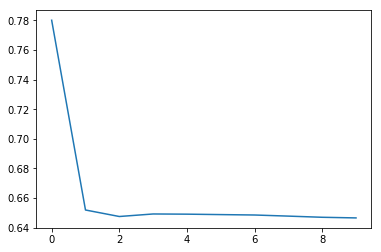

In [29]:
plt.plot([log_loss(y_valid, np.mean(preds[:i+1], axis = 0)) for i in range(10)])

In [30]:
possible_features = [None,'sqrt', .5]

In [31]:
log_loss_list = []

In [32]:
for stuff in possible_features:
    x = RandomForestClassifier(max_features=stuff)
    x.fit(trn_q1-trn_q2,y_train)
    predict_trn = x.predict_proba(trn_q1-trn_q2)
    predict_val = x.predict_proba(val_q1-val_q2)
    log_loss_list.append(log_loss(y_valid, predict_val))
    

([<matplotlib.axis.XTick at 0x7f46c72bf1d0>,
 <a list of 3 Text xticklabel objects>)

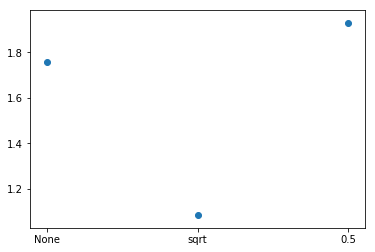

In [33]:
plt.scatter(range(0,3), log_loss_list)
plt.xticks(range(0,3), possible_features)

In [ ]:
plt.plot([log_loss(y_valid, np.mean(preds[:i+1], axis = 0)) for i in range(2)])

In [ ]:
quick = [RandomForestClassifier(max_depth=3),RandomForestClassifier(max_depth=4)]

In [ ]:
plt.plot([log_loss(y_valid, np.mean(quick[:i+1], axis = 0)) for i in range(2)])